# Summary Report - Women's Shoes Dataset

*Prepared by (Team 7) Elmira Ushirova, Chenran Peng, Qiaoling Huang, Ziqin Ma, Shihan Li* 

The dataset that we have used for our analysis is a sampled dataset from a larger dataset of Women's shoes listings from Datafiniti database and contains around 10,000 (9,709 after data cleanup) online women shoes listings for the period of April 2015 - April 2019. The dataset has 32 columns and includes information such as name, brand, minimum and maximum prices, size, color, url links and much more for each offered pair of women shoes. 

Link to the original dataset source (Kaggle): https://www.kaggle.com/datafiniti/womens-shoes-prices#Datafiniti_Womens_Shoes_Jun19.csv 


We faced some challenges with uploading raw dataset to the BigQuery. Thus, for the purposes of our analysis, we have decided to manually clean up data and focus mainly on date, price, brands, name, size columns. 

The final dataset that was used for our analysis is represented below:

In [1]:
%%bq query
SELECT * 
FROM `msba770a-team7.Women_shoes.Final_ver_formatted` 
LIMIT 10

id,dateAdded,brand,colors,name,prices_amountMax,prices_amountMin,prices_offer,sizes
AWo1YqMAAGTnQPR7rZGm,2019-04-19,A35,Cognac,"Womens A35 Kallumm Wide Calf Knee High Boots, Black/Neo",95.6,95.6,Online only: 20% off,12
AWo41JEA0U_gzG0hfdD6,2019-04-20,CAT,Black,New CAT Womens Ness Black Fashion Boots Size 6.5,167.98,167.98,Online only: 45% off,6.5
AWo-DTAvAGTnQPR7sQQg,2019-04-21,I35,champagne,"Womens I35 Fayena Ankle Strap Closed Heel Ballet Flats, Jade, 6 US",60.42,60.42,Online only: 24% off,9
AWo5wpqu0U_gzG0hfttg,2019-04-20,JBU,Brown,Jbu By Jambu Women's Peterson Ankle Bootie,46.82,46.82,Online only: 48% off,9
AWozt8AaJbEilcB6MEM4,2019-04-19,JBU,Black,Jbu By Jambu Women's Evans Weather Ready Motorcycle Boot,64.0,64.0,Online only: 7% off,7
AWpjAxVBM263mwCq9tSL,2019-04-28,MAH,Beige,"MAH Women's Closed Toe Faux Suede Tassel Chunky Stacked Heel Ankle Bootie (A.Green, 8.5 M US Women)",51.97,51.97,Online only,8
AWpDHEyzAGTnQPR7sp03,2019-04-22,MAH,Black,Women's Chic Combat Lace Up Pull On Tab Stacked Heel Ankle Bootie,19.99,19.99,Online only,8
AWpDH_iBAGTnQPR7sqj4,2019-04-22,MAH,Khaki,Women's Chic Combat Lace Up Pull On Tab Stacked Heel Ankle Bootie,19.99,19.99,Online only,7
AWpDGMSpAGTnQPR7spUx,2019-04-22,MAH,Black,Women's Chic Combat Lace Up Pull On Tab Stacked Heel Ankle Bootie,19.99,19.99,Online only,9
AWpDIldEAGTnQPR7srED,2019-04-22,MAH,Wine,Women's Chic Combat Lace Up Pull On Tab Stacked Heel Ankle Bootie,19.99,19.99,Online only,6.5


*Note: during the analysis, we have identified that Min and Max prices columns are the same, so these columns are treated as a general price. Thus, in queries below only one of those 2 columns might be used.*

By analyzing this dataset, we would like to identify what trends the shoes manufacturers follow nowadays and what kind of pricing strategies shoe brands have now. We are aiming at answering the following questions:

 Q1. What is the average price of each distinct brand listed?

 Q2. Which brands have the highest prices?

Q3. What's the range of the average price among these brands and what's the percentage of these range?

 Q4. Which ones have the widest distribution of prices?

 Q5. Is there a typical price distribution (e.g., normal) across brands or within specific brands?

 Q6. Which average price range is most popular among brands?

 Q7. Which size is most popular while on sale?

 Q8. The retailer usually release new shoes in which month?(frequency of launching new product).

This analysis might be useful for those who would like to start an online women shoes business, in terms of understanding current shoe market.

## Question 1: What is the average price of each distinct brand listed?

In order to find the average price for each brand, we selected brands and computed the average price for each brand from the data. We exclude the missing data (NULL) in the price column so the result won't be affected by the missing data. Lastly, we used group by brand to show distinct brand and limit 50 for showing only 50 results from the query table (for presenting purposes).

In [6]:
%%bq query
SELECT brand,
      AVG(prices_amountMax) AS avg_price
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE prices_amountMax IS NOT NULL 
GROUP BY brand;

brand,avg_price
A35,72.795
CAT,133.965
I35,60.42
JBU,55.41
MAH,26.9883333333
SAS,141.614197802
SNJ,112.353636364
UGG,169.868857143
Ugg,98.99
X2B,49.05


As a result, we get average prices for each of 493 distinct brand in the data.

## Question 2:  Which brands have the highest prices?

To answer this question, we used the same query as above and order by the average price in descending order. By doing that, we're able to see the highest prices among the brands. And also I use limit 10 to show only top 10 brands who have highest price. The result shows that PUMA and STEVE-MADDEN are in the top 10 of highest price brands. However, based on personal shopping experience, PUMA and STEVE-MADDEN do not mainly sell their shoes in a high price as the chart shows. This might be a limitation of our dataset, because it was a random sample not all listings got into the sample to truly represent the brand pricing strategy.

In [68]:
%%bq query -n avg_price
SELECT brand,
       AVG(prices_amountMax) as avg_price
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE prices_amountMax IS NOT NULL 
GROUP BY brand
ORDER BY avg_price DESC
LIMIT 10;

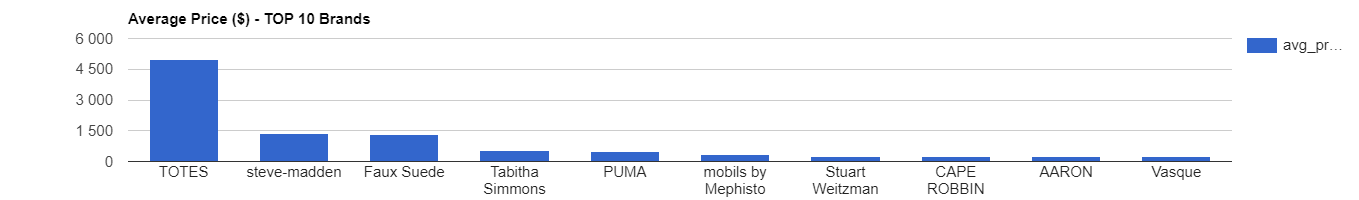

In [67]:
%%chart columns --data avg_price
title: Average Price ($) - TOP 10 Brands

As we can see, TOTES brand has the highest average of 5000. After we inspected the dataset, we have found out that TOTES brand has only one listing. And if we search the TOTES brand, in general it offers shoes for less that 100. Therefore, in this case, we may consider this listing as an outlier in our dataset.  

In [13]:
%%bq query -n avg20
SELECT *
FROM 
(SELECT brand,
       AVG(prices_amountMax) as avg_price
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE prices_amountMax IS NOT NULL 
GROUP BY brand
ORDER BY avg_price DESC
LIMIT 20)
ORDER BY avg_price 
LIMIT 10

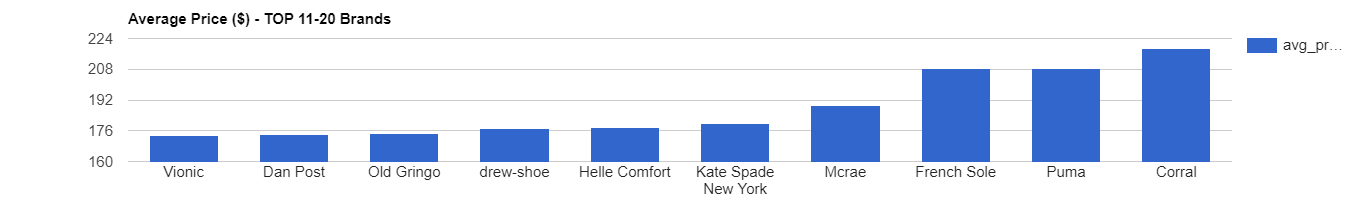

In [18]:
%%chart columns --data avg20
title: Average Price ($) - TOP 11-20 Brands
 

This graph of TOP 11 to 20 average price shows more realistic picture. For instance, the average price for Kate Spade New York is 179.We have searched this brand online and confirmed that overall this brand offers shoes in the price range of 100 to 350, so it is more convincing.  

## Question 3: What's the range of the average price among these brands and what's the percentage of these range?

We broke down seven price ranges by using case when statement and giving the letter for each price range so we can order by the price range later. We also counted the number of each price range inside the case statement. The range that we broke down mainly focus on lower average price as we found that most brands are in a lower range. In order to show the percentage of the range, we used a pie chart. From the chart we can see that there is 49.9% of total brands in our dataset have average price in the range of 1 to 50, and 34.3% have average price in the range of 50 to 100. As a result, most of brands in the market are tend to sell women shoes for lower price.

In [59]:
%%bq query -n count_price_range
SELECT 
CASE WHEN avg_price < 50 THEN 'a-1-50'
     WHEN avg_price >=50 AND avg_price < 100 THEN 'b-50-100'
     WHEN avg_price >=100 AND avg_price < 150 THEN 'c-100-150'
     WHEN avg_price >=150 AND avg_price < 200 THEN 'd-150-200'
     WHEN avg_price >=200 AND avg_price < 250 THEN 'e-200-250'
     WHEN avg_price >=250 AND avg_price < 300 THEN 'f-250-300'
     ELSE 'g-300+'
     END AS price_range,
count(*) AS count_price_range
FROM
(SELECT brand,
        AVG(prices_amountMax) AS avg_price
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE prices_amountMax IS NOT NULL 
GROUP BY brand
ORDER BY avg_price)
GROUP BY price_range
ORDER BY price_range;

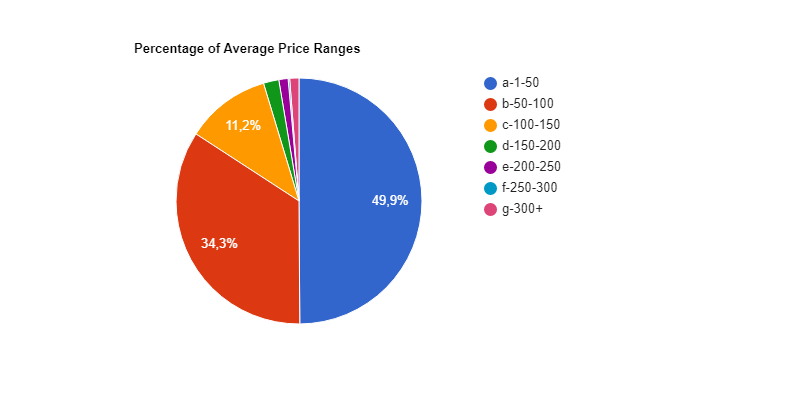

In [70]:
%%chart pie --data count_price_range
title: Percentage of Average Price Ranges
height: 400
width: 800

## Question 4:  Which ones have the widest distribution of prices?

We tried to analyze which brand have the widest distribution of prices to see the price range for each brand. So we decided to use the maximum price minus the minimum price from the table, then group by each brand.

In [9]:
%%bq query
SELECT brand,
MAX(prices_amountMax) - MIN(prices_amountMin) AS price_dist
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
GROUP BY brand
ORDER BY price_dist DESC
LIMIT 10

brand,price_dist
Nature Breeze,4987.0
Trotters,4984.0
White Mountain,4981.74
SoftWalk,4979.26
PUMA,4976.0
Puma,4970.01
Faux Suede,4944.12
steve-madden,4881.37
Aerosoles,1985.77
Easy Street,985.76


This result showed the price range for each brand from biggest to smallest. We can see that Nature Breeze has the largest price range as 4987.0. Some of the brands have a price range as 0 is because these brands only have 1 item listed, so they don't have a price range. We can see here are top 10 brand that have the widest price distribution listed, these brand usually sell low price shoes, however, they also target high income people, so they have some shoes that sell for around 5000 dollars. That's why they have really large price range.

In [10]:
%%bq query
SELECT *
FROM 
(SELECT brand,
MAX(prices_amountMax) - MIN(prices_amountMin) AS price_dist
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
GROUP BY brand
ORDER BY price_dist DESC
LIMIT 20)
ORDER BY price_dist
LIMIT 10

brand,price_dist
Ros Hommerson,252.81
David Tate,272.81
Avia,292.99
Bella Vita,302.7
Lifestride,312.58
UGG,332.78
Asics,342.58
INC International Concepts,879.01
CAPE ROBBIN,965.0
SNJ,982.0


We also have top 10 to 20 brand listed, we can see that these brands have smaller price range compare to the top 10. They have a price range around 300 dollars. These brand tend to target certain group of people with various price options.

In [11]:
%%bq query -n PRICE
SELECT brand,
MAX(prices_amountMax) - MIN(prices_amountMin) AS price_dist
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
GROUP BY brand
ORDER BY price_dist DESC
LIMIT 20

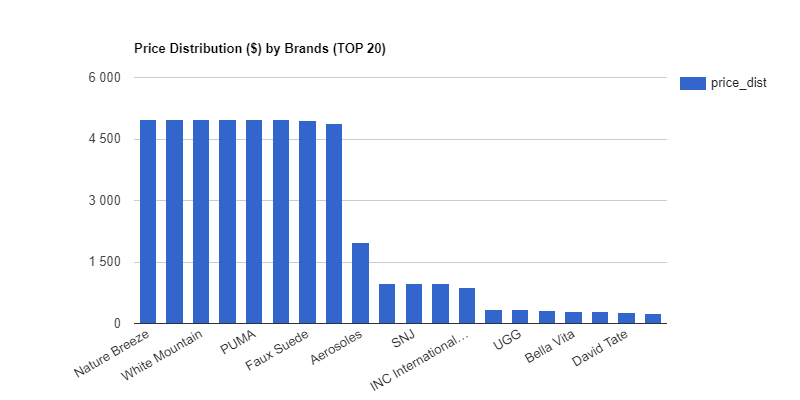

In [72]:
%%chart columns --data PRICE
title: Price Distribution ($) by Brands (TOP 20)
height: 400
width: 800

As in question 2, because of limited data and outliers presented in our dataset, the first TOP 10 brands' price distribution may not be reliable. Thus, we will not focus our analysis on the first 10 brands. 

## Question 5:  Is there a typical price distribution (e.g., normal) across brands or within specific brands?

### A. Price distribution across brands

Before creating the query to observe the price dstribution, we would like to get an overview of the data. So we first select the maximum, minimum, and the average value of column 'prices_amountMax'.

In [73]:
%%bq query
SELECT MAX(prices_amountMax) AS max, 
  MIN(prices_amountMax) AS min, 
  AVG(prices_amountMax) AS mean, 
  COUNT(prices_amountMax) AS count_price 
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE prices_amountMax IS NOT NULL

max,min,mean,count_price
5000.0,5.0,72.7572551241,9709


The mean value is about 73, while the maximum is 5000. Then we can infer that the shape of distribution might be right-skewed. Now, we run the query to list the prices in a bar chart.

In [27]:
%%bq query -n distr_all
SELECT prices_amountMax as prices
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`

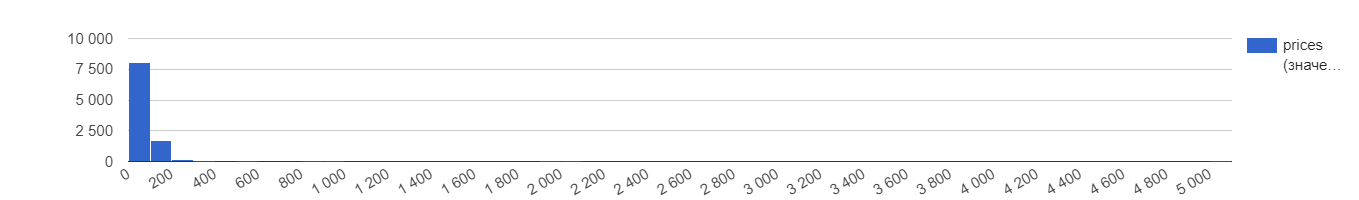

In [28]:
%%chart histogram -d distr_all

Majority of the prices fall in the range between 0 and 200, though this graph is extremely dragged to the right by the maximum value. To better observe the distribution of most prices, we take an upper limit of $500 on prices.

In [29]:
%%bq query -n distr_500
SELECT prices_amountMax as prices
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE prices_amountMax < 500

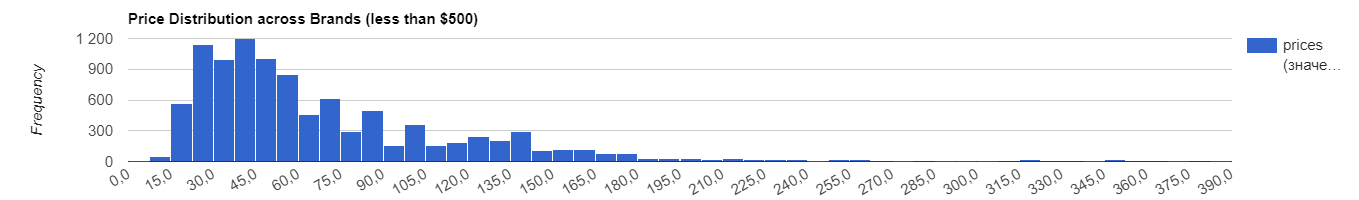

In [30]:
%%chart histogram -d distr_500
title: Price Distribution across Brands (less than $500)
vAxis:
    title: Frequency

It becomes more clear that prices of shoes across brands in the dataset spread in a right-skewed distribution, which is the impact of upper extreme values.

### B. Price distribution within shoe types

We pick some common shoe types from the 'name' column and draw each a histogram over prices within that type.

1) By boots/bootie

In [31]:
%%bq query -n distr_boot
SELECT prices_amountMax as prices
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE (name LIKE '%bootie%' OR name LIKE '%boot%')
AND prices_amountMax < 500

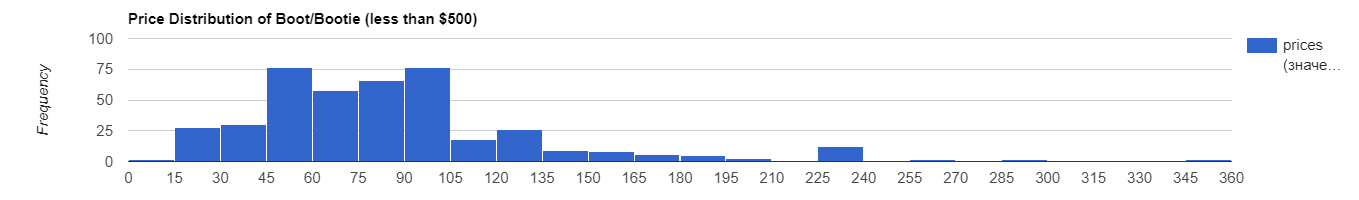

In [32]:
%%chart histogram -d distr_boot
title: Price Distribution of Boot/Bootie (less than $500)
vAxis:
    title: Frequency

*Note: we set a condition to limit prices less than $500 for a better view of the chart.*

2) By flats

In [19]:
%%bq query -n distr_flat
SELECT prices_amountMax as prices
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE name LIKE '%flat%' 
AND prices_amountMax < 200

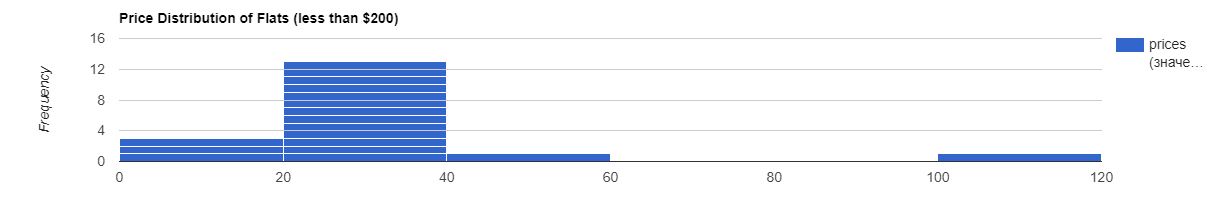

In [20]:
%%chart histogram -d distr_flat
title: Price Distribution of Flats (less than $200)
vAxis:
    title: Frequency

Note: we set a condition to limit prices less than $200 for a better view of the chart.

3) By sandals

In [33]:
%%bq query -n distr_sand
SELECT prices_amountMax as prices
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE name LIKE '%sandal%' 
AND prices_amountMax < 200

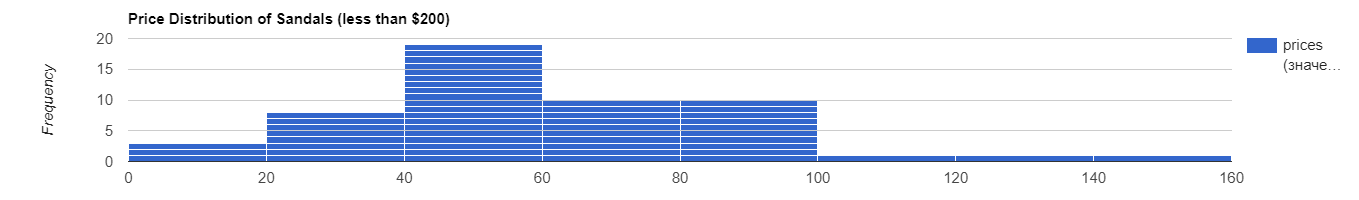

In [34]:
%%chart histogram -d distr_sand
title: Price Distribution of Sandals (less than $200)
vAxis:
    title: Frequency

*Note: we set a condition to limit prices less than $200 for a better view of the chart.*

Summary: all three distributions are right-skewed and prices are clustered within/around the range of 40 to 60. Comparing the boots/bootie category to flats and sandals, boots have a higher average price, which is reasonable, basing on our personal experience and common sense (booties require more materials for production rather than sandals and flats).  

### C. Price distribution over selected brands

First, we select brand name, number of items recorded, and the average price of each brand form the table.

In [21]:
%%bq query
SELECT brand, COUNT(prices_amountMax) AS freq, 
       AVG(prices_amountMax) AS mean 
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
GROUP BY brand
ORDER BY COUNT(prices_amountMax) DESC, AVG(prices_amountMax) DESC
LIMIT 10;

brand,freq,mean
Brinley Co.,1002,35.9165868263
SAS,455,141.614197802
Trotters,449,104.81922049
Propet,431,63.6216473318
Pleaser,350,74.3182571429
Soda,344,33.1130232558
Aerosoles,235,94.3735744681
L'Artiste by Spring Step,229,120.229257642
Drew,196,140.198112245
Easy Street,159,68.5271069182


The result provides an overview of the most popular brand in terms of numbers in record and the average price (could be used to infer the possible target customer group). We choose the top 4 brands (Brinley Co., SAS, Trotters, Propet) in order of numbers recorded. Also, two of them have mean prices over $100, while the other two have mean prices lower than overall average.

In [39]:
%%bq query -n distr_bc
--Brinley Co.
SELECT prices_amountMax AS price FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE brand = 'Brinley Co.'

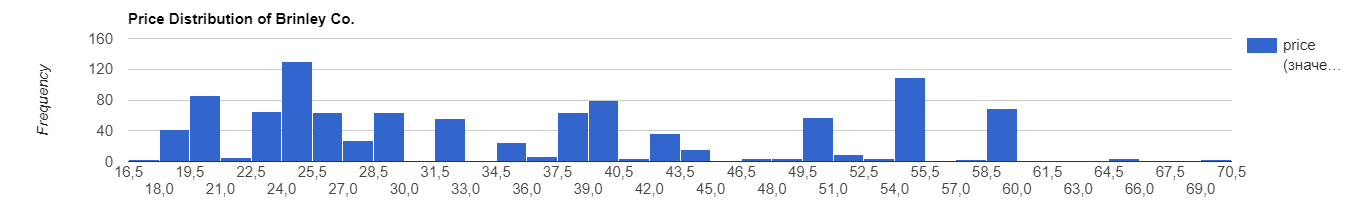

In [38]:
%%chart histogram -d distr_bc
title: Price Distribution of Brinley Co.
vAxis:
    title: Frequency

In [40]:
%%bq query -n distr_sas
--SAS
SELECT prices_amountMax AS price FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE brand = 'SAS'

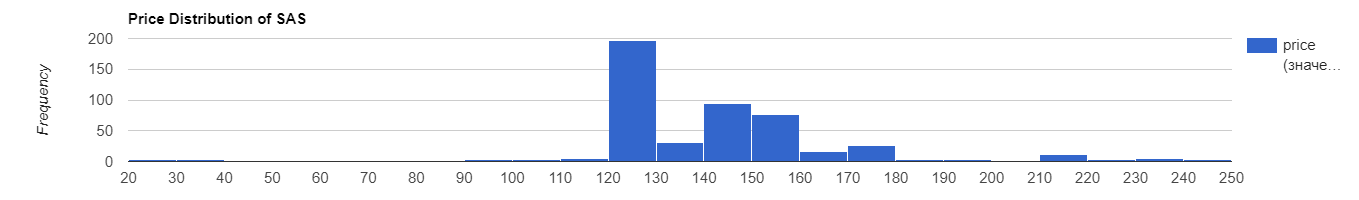

In [41]:
%%chart histogram -d distr_sas
title: Price Distribution of SAS
vAxis:
    title: Frequency


In [42]:
%%bq query -n distr_trot
--Trotters
SELECT prices_amountMax AS price FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE brand = 'Trotters' AND prices_amountMax != 5000

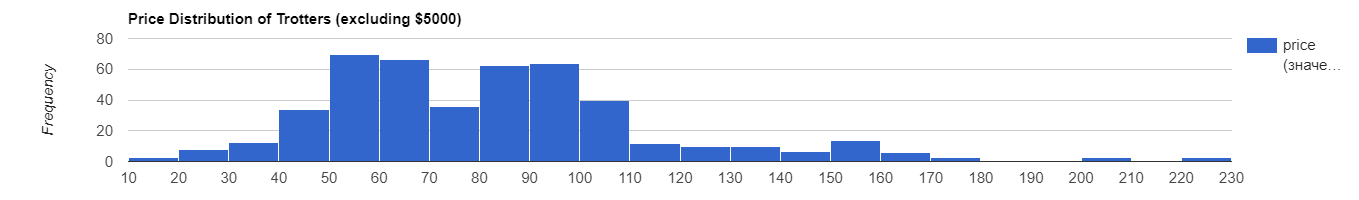

In [43]:
%%chart histogram -d distr_trot
title: Price Distribution of Trotters (excluding $5000)
vAxis:
    title: Frequency

*Note: we exclude two items with price of $5000 in sake of a better visualization of prices.*

In [44]:
%%bq query -n distr_pro
--Propet
SELECT prices_amountMax AS price FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE brand = 'Propet'

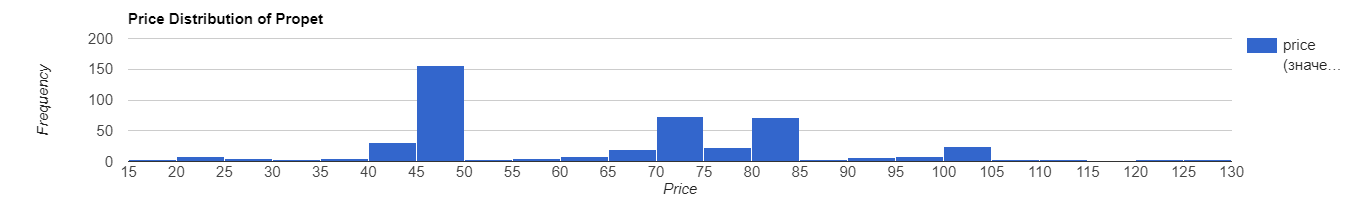

In [45]:
%%chart histogram -d distr_pro
title: Price Distribution of Propet
hAxis:
    title: Price
vAxis:
    title: Frequency

Observation: The product prices of Brinley Co., which is the most popular brand by number stocked, is relatively even-spreaded around the mean value (36). Both SAS and Trotters has right-skewed distributions. Propet also has a right-skewed distribution, though the spread of prices is not continuous compared to other three. We can conclude that the more number of listings we have for the analysis, the more normal price distribution it looks like. 

## Question 6:  Which average price range is most popular among brands?

In order to answer this question, we have identified 21 price buckets - price ranges from 0 to 1000 with an interval of 50, and one more bucket with prices above 1000. Then we counted number of brands for each of the range. The results table below shows that in general, majority of online women shoes listings are in the price range of 0 to 150, with the most popular price range being from 0 to 50.  

In [77]:
%%bq query
SELECT price_range,
COUNT(brands) AS number_of_brands,
STRING_AGG(brands, "; "  LIMIT 25) AS brands_name
FROM
(
SELECT DISTINCT brand AS brands,
       CASE WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 0  AND 50 THEN '(0, 50)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 50 AND 100 THEN '(50, 100)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 100 AND 150 THEN '(100, 150)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 150 AND 200 THEN '(150, 200)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 200 AND 250 THEN '(200, 250)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 250 AND 300 THEN '(250, 300)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 300 AND 350 THEN '(300, 350)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 350 AND 400 THEN '(350, 400)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 400 AND 450 THEN '(400, 450)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 450 AND 500 THEN '(450, 500)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 500 AND 550 THEN '(500, 550)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 550 AND 600 THEN '(550, 600)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 600 AND 650 THEN '(600, 650)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 650 AND 700 THEN '(650, 700)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 700 AND 750 THEN '(700, 750)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 750 AND 800 THEN '(750, 800)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 800 AND 850 THEN '(800, 850)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 850 AND 900 THEN '(850, 900)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 900 AND 950 THEN '(900, 950)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 950 AND 1000 THEN '(950, 1000)'
            WHEN CAST(prices_amountMax AS NUMERIC) > 1000 THEN '(1000+)'END AS price_range
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
)
GROUP BY price_range
ORDER BY number_of_brands DESC;

price_range,number_of_brands,brands_name
"(0, 50)",356,JBU; MAH; SAS; SNJ; X2B; AXNY; Ahnu; Avia; DBDK; Fila; IZOD; Keds; Lamo; Link; Lugz; MG35; PUMA; Puma; Ryka; SALE; SODA; Soda; TOMS; Toms; Vans
"(50, 100)",269,A35; I35; JBU; MAH; SAS; UGG; Ugg; X2B; ugg; AXNY; Ahnu; Aldo; Avia; Bogs; Born; Diba; Drew; ECCO; Fila; Keds; Lamo; Mozo; PUMA; Puma; Roxy
"(100, 150)",119,SAS; UGG; Ahnu; Apex; Bogs; Diba; Drew; Fila; Keds; Lamo; Muck; PUMA; Puma; Ryka; Toms; ASICS; Asics; Coach; ELLIE; Earth; Ellie; Guess; Jambu; SOREL; Sorel
"(150, 200)",53,CAT; SAS; UGG; Bogs; Diba; Drew; Lamo; PUMA; Asics; ELLIE; Jambu; Mcrae; SOREL; Sorel; catan; Corral; Mizuno; Vionic; mizuno; Alegria; Pleaser; Saucony; pleaser; Miz Mooz; Old West
"(200, 250)",23,SAS; UGG; Drew; AARON; Coach; SOREL; catan; Carlos; Mizuno; Vasque; Vionic; Pleaser; Dan Post; Trotters; Aerosoles; Cole Haan; Diba True; David Tate; Old Gringo; French Sole; New Balance; MICHAEL Michael Kors; L'Artiste by Spring Step
"(250, 300)",11,UGG; Drew; Carlos; Corral; Aerosoles; David Tate; Spring Step; Ros Hommerson; Stuart Weitzman; LifeStride Shoes; L'Artiste by Spring Step
(1000+),10,PUMA; Puma; TOTES; SoftWalk; Trotters; Aerosoles; Faux Suede; steve-madden; Nature Breeze; White Mountain
"(300, 350)",9,Avia; Old West; Aerosoles; aerosoles; Bella Vita; Lifestride; Easy Street; White Mountain; mobils by Mephisto
"(950, 1000)",3,SNJ; CAPE ROBBIN; Easy Street
"(350, 400)",2,UGG; Asics


In [2]:
%%bq query -n ranges
SELECT price_range,
COUNT(brands) AS number_of_brands
FROM
(
SELECT DISTINCT brand AS brands,
       CASE WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 0  AND 50 THEN   '(0, 50)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 050 AND 100 THEN  '(050, 100)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 100 AND 150 THEN '(100, 150)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 150 AND 200 THEN '(150, 200)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 200 AND 250 THEN '(200, 250)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 250 AND 300 THEN '(250, 300)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 300 AND 350 THEN '(300, 350)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 350 AND 400 THEN '(350, 400)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 400 AND 450 THEN '(400, 450)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 450 AND 500 THEN '(450, 500)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 500 AND 550 THEN '(500, 550)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 550 AND 600 THEN '(550, 600)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 600 AND 650 THEN '(600, 650)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 650 AND 700 THEN '(650, 700)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 700 AND 750 THEN '(700, 750)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 750 AND 800 THEN '(750, 800)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 800 AND 850 THEN '(800, 850)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 850 AND 900 THEN '(850, 900)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 900 AND 950 THEN '(900, 950)'
            WHEN CAST(prices_amountMax AS NUMERIC) BETWEEN 950 AND 1000 THEN '(950, 1000)'
            WHEN CAST(prices_amountMax AS NUMERIC) > 1000 THEN '(above 1000)'END AS price_range
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
)
GROUP BY price_range
ORDER BY price_range ASC;

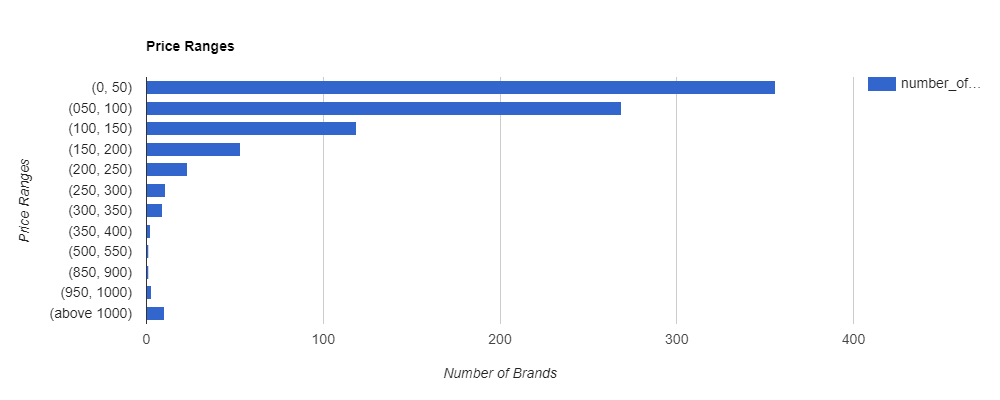

In [4]:
%%chart bars -d ranges
title: Price Ranges
hAxis:
    title: Number of Brands
vAxis:
    title: Price Ranges 
height: 400
width: 1000

The chart above confirmes that most of brands are represented in lower price ranges. According to these results, we may say that most brands tend to target audience with more affordable prices, which is quite reasonable as there are more people with low to medium income levels rahter than high income level.

## Question 7: Which size is most popular while on sale?

Firstly, we identified that all the data can be separated into ‘on sale’ and ‘not on sale’ groups. To answer this question, one condition is to make sure the sizes counted are in group ‘on sale’, so we used the command ‘WHERE’. To add on that, we need to group all the sizes, count them and oder them in descend order. We created a control group, which are the sizes counted from ‘not on sale’ group. The result tells us that the popular sizes while on sale are 6,7,8 and 9 (beside multiple sizes offers), while the most popular size is 8. These sizes are the gold sizes for woman so apparently they go out very fast even if they are not on sale. The only difference is the order among them, size 7 is the most popular size with regular price.

*Note: the data contained some listings that offer several shoe sizes. We marked them as 'multiple' in size columns.*

In [6]:
%%bq query
SELECT   
   sizes,
   count(sizes) AS count 
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE
  prices_offer <> 'Online only'
  AND prices_offer IS NOT NULL
  AND sizes IS NOT NULL
GROUP BY sizes
ORDER BY
  count DESC
LIMIT 17;


sizes,count
multiple,584
8,384
7,342
6,334
9,301
10,247
11,153
5,144
12,90
6.5,50


In [7]:
%%bq query
SELECT   
   sizes,
   count(sizes) AS count
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
WHERE
  prices_offer = 'Online only'
  AND prices_offer IS NOT NULL
  AND sizes IS NOT NULL
GROUP BY sizes
ORDER BY
  count(sizes) DESC
LIMIT 17

sizes,count
7,752
8,736
6,647
9,633
10,565
multiple,532
11,307
5,261
8.5,189
6.5,188


## Question 8: The retailer usually release new shoes in which month?(frequency of launching new product).

We tried to identify in which month the retailer usually release new shoes. We extracted month from dateadded column and then counted all results from the data and group it by month.

In [14]:
%%bq query
SELECT extract(month FROM dateAdded) AS Month, 
       count(extract(month FROM dateAdded)) AS TIMES 
FROM `msba770a-team7.Women_shoes.Final_ver_formatted`
GROUP BY Month
ORDER BY times DESC


Month,TIMES
4,8329
1,732
5,410
11,103
9,69
8,34
10,25
12,5
7,1
3,1


Based on the result we can see that April is the month that most brand lauch their product, there are 8329 items lauched in April. However, partially the reason behind it might be that our dataset is for the period of April 2015 to April 2019. Nevertheless, we believe that one additional month would not add such a big difference comparing to other months, so it still may be implied that April is a popular month for online shoes releases. It also showed that most items were released in April, January and May, so we may conclude that during those 4 years most brands release more summer shoes than winter shoes.

# Conclusion

We have analyzed a sample of ~9,700 of online women's shoes listings and came to conclusion that most brands tend to offer more shoes for low prices rather than for high prices. There are some brands that offer expenisive shoes, however these brands also have options in lower price ranges. So this means that brands tend to target low to medium level income audience offering "affordable prices". 

We also identified that price distribution across brands, within specific brands, and within common shoe types tend to be skewed to the right. We have noticed that the more listings we had for our analysis, the more normal price distribution it looks like.

In addition, we found out that the sizes 6, 7, 8, 9 indeed are the most popular and that the most of the listings were release during April, May and January.

We would like to note here that our analysis has limitations and is subject for further research.